In [1]:
# Automatic reloading of imports
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Put in the pyodine path on your machine here!
pyodine_path = '/Users/samkleiman/pyodine'

sys.path.append(pyodine_path)

import pyodine
import pyodine_model_observations       # <- the observation modelling routines

In [2]:
import utilities_song as utilities

Pars = utilities.pyodine_parameters.Parameters()

In [3]:
# Observations to model
obs_dir = os.path.join(pyodine_path, 'tutorial_data/sigdra_obs_tutorial')
obs_files = [os.path.join(obs_dir, f) for f in os.listdir(obs_dir)]
obs_files.sort()

# Deconvolved stellar template to use
temp_file = os.path.join(pyodine_path, 'tutorial_data/temp_results/temp_sigdra_2018-05-16.h5')
temp_files = [temp_file] * len(obs_files)

# Output directories for plots, log files, and output pathnames for modelling results
plot_dir_parent = os.path.join(pyodine_path, 'tutorial_data/obs_results')
plot_dirs = []
error_files = []
info_files = []
res_files = []
for obs_file in obs_files:
    # Plot directories
    plot_dir_base = os.path.splitext(os.path.basename(obs_file))[0]
    plot_dirs += [os.path.join(plot_dir_parent, plot_dir_base)]
    
    # Log files
    error_files += [os.path.join(plot_dirs[-1], 'error.log')]
    info_files  += [os.path.join(plot_dirs[-1], 'info.log')]
    
    # Result files
    res_files.append([os.path.join(plot_dirs[-1], plot_dir_base + '_res0.h5'), 
                      os.path.join(plot_dirs[-1], plot_dir_base + '_res1.h5')])


In [4]:
pyodine_model_observations.model_single_observation(
    utilities, Pars, obs_files[0], temp_files[0], 
    plot_dir=plot_dirs[0], res_names=res_files[0],
    error_log=error_files[0], info_log=info_files[0])


Branch: master
Hash: c2a71ac
---------------------------
Working on: /Users/samkleiman/pyodine/tutorial_data/sigdra_obs_tutorial/s1_2015-05-02T03-48-48_ext.fits

Median flux of the observation: 31774
Loading template from file: /Users/samkleiman/pyodine/tutorial_data/temp_results/temp_sigdra_2018-05-16.h5

Order correction: -1

Measured velocity rel. to reference spectrum: 26.632 km/s
Template velocity: 25.136 km/s
Velocity guess: 1.495 km/s (relative to template)

(Barycentric velocity of observation: 0.894 km/s)
(Barycentric velocity of template: 2.026 km/s)


Barycentric redshift between template and observation: 
v = 1131.4373999999998, z = 3.7740689260434957e-06


Total number of chunks: 528
Nr. chunks in order 0: 22
First and last covered pixel of chunks in order 0: 3, 2004
Orders: 17 - 40 (24 in total)

----------------------
RUN 0
----------------------

Constraining parameters for RUN 0

Number of chunks with no uncertainties: 0
Number of chunks with outliers: 0
Number of chu

In [5]:
# Restore the RUN 1 fit results for the first observation
chunks, fit_results = pyodine.fitters.results_io.restore_results_object(
    utilities, res_files[0][1])

Loading template from file: /Users/samkleiman/pyodine/tutorial_data/temp_results/temp_sigdra_2018-05-16.h5
Total number of created chunks: 528 (in result file: 528)
Number of created chunks in order 0: 22


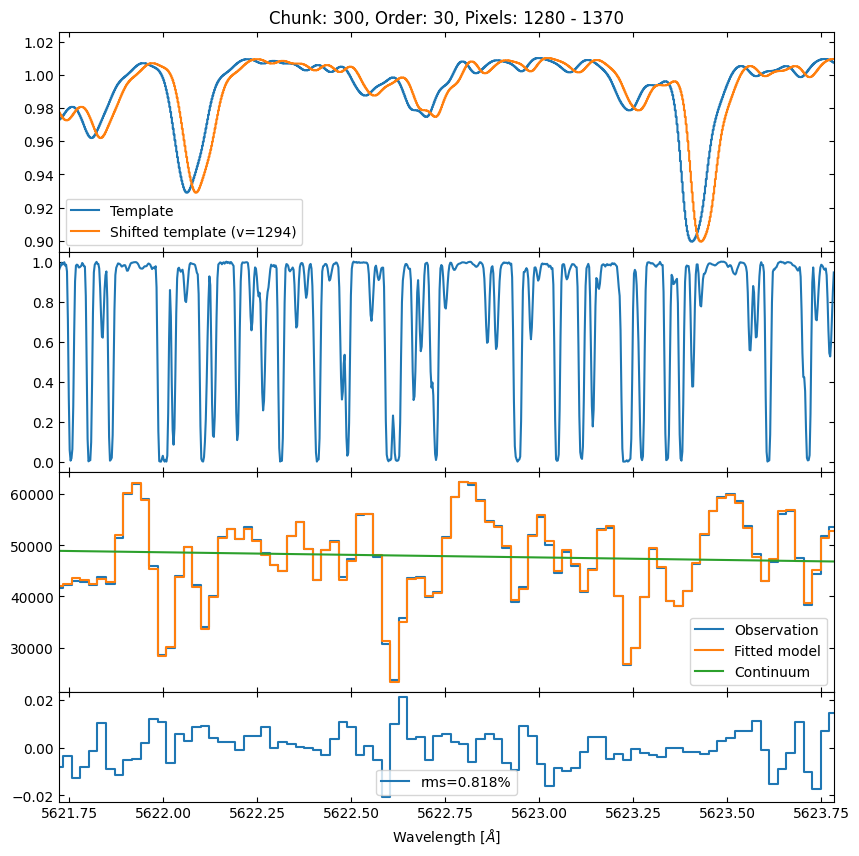

In [6]:
# Chunk index
chunk_ind = 300

pyodine.plot_lib.plot_chunkmodel(fit_results, chunks, chunk_ind, template=True, 
                                 show_plot=True)

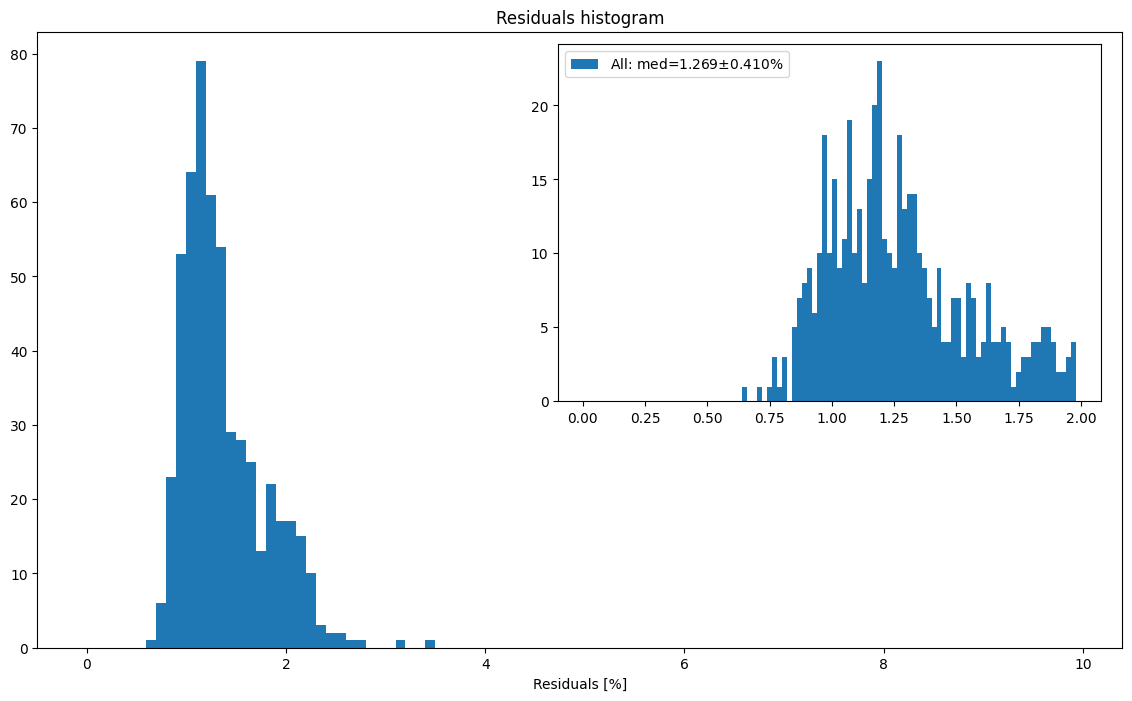

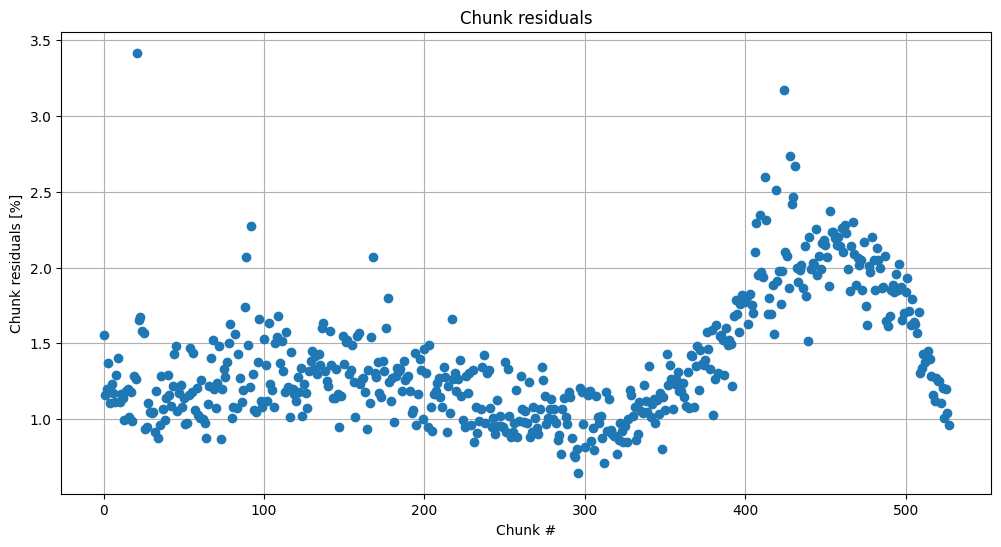

In [7]:
# Plot the histogram of residuals
residuals = pyodine.plot_lib.plot_residual_hist(fit_results, title='Residuals histogram', 
                                                show_plot=True)
# Plot the scatter of residuals
pyodine.plot_lib.plot_chunk_scatter(scatter=residuals, ylabel='Chunk residuals [%]', 
                                    title='Chunk residuals', show_plot=True)

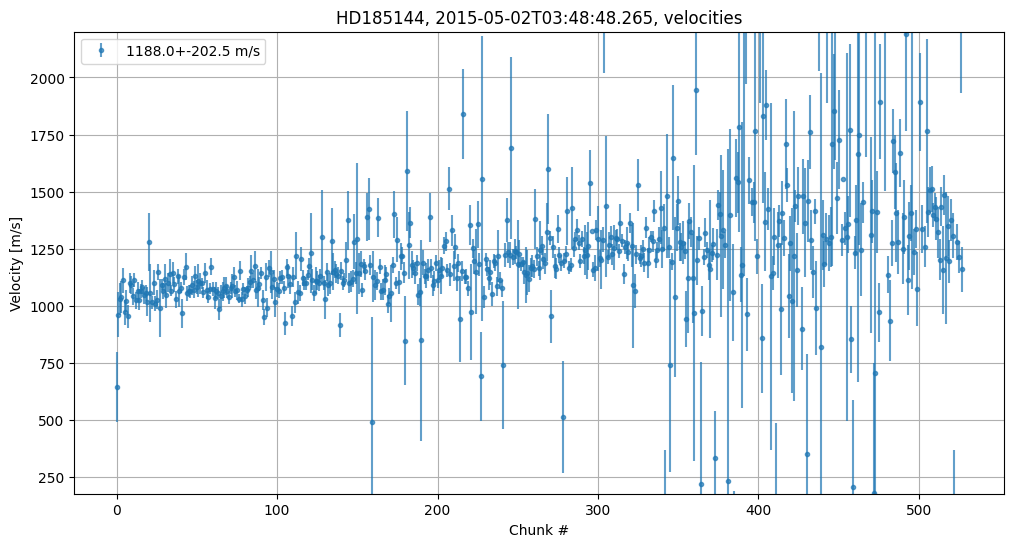

In [8]:
# Fetch observation info
star_name = chunks[0].observation.star.name
obs_date  = chunks[0].observation.time_start.value

# Fetch the velocities and and their fit uncertainties
velocities = np.array([r.params['velocity'] for r in fit_results])
vel_errors = [r.errors['velocity'] for r in fit_results]

# Compute robust mean and std
vel_med = pyodine.timeseries.misc.robust_mean(velocities)
vel_std = pyodine.timeseries.misc.robust_std(velocities)

# And plot (in constraint y-range)
pyodine.plot_lib.plot_chunk_scatter(
    errorbar=velocities, errorbar_yerr=vel_errors, errorbar_alpha=0.7, 
    errorbar_label='{:.1f}+-{:.1f} m/s'.format(vel_med, vel_std),
    yrange=(vel_med-5*vel_std, vel_med+5*vel_std),
    ylabel='Velocity [m/s]', title='{}, {}, velocities'.format(star_name, obs_date), 
    grid=True, show_plot=True
)

In [9]:
pyodine_model_observations.model_multi_observations(
    utilities, Pars, obs_files[1:], temp_files[1:], 
    plot_dirs=plot_dirs[1:], res_files=res_files[1:], 
    error_files=error_files[1:], info_files=info_files[1:], quiet=True)


Done, full working time:  1069.5983018875122
